In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df1=pd.read_csv("/content/anime.csv")
df2=pd.read_csv("/content/rating.csv")

In [3]:
df2.head(20)

,user_id,anime_id,rating
0,1,20,-1.0
1,1,24,-1.0
2,1,79,-1.0
3,1,226,-1.0
4,1,241,-1.0
5,1,355,-1.0
6,1,356,-1.0
7,1,442,-1.0
8,1,487,-1.0
9,1,846,-1.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#Adding the both df to understand it well
# Merge datasets on the 'anime_id' column
df_final = pd.merge(df1, df2, on='anime_id')

df_final.head(20)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1.0
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10.0
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10.0
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8.0
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10.0
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10.0


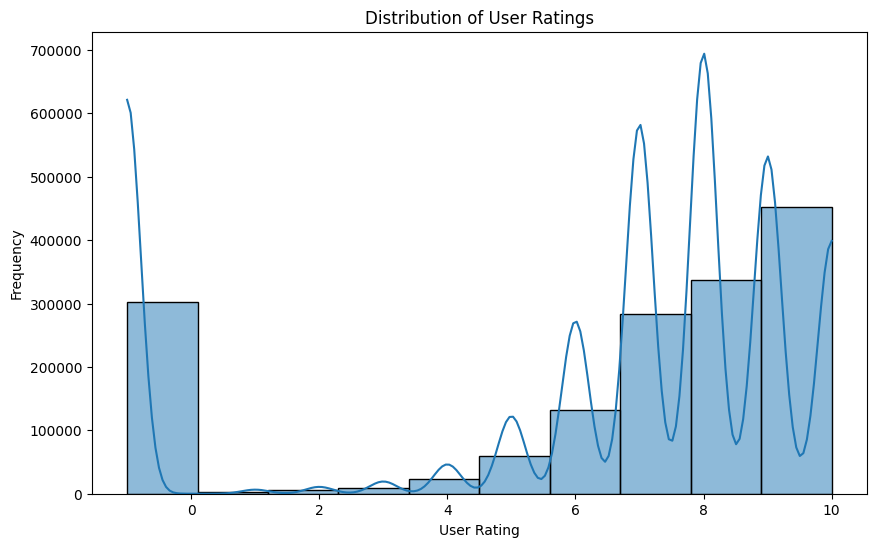

In [5]:
#Distribution of User Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_final['rating_y'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

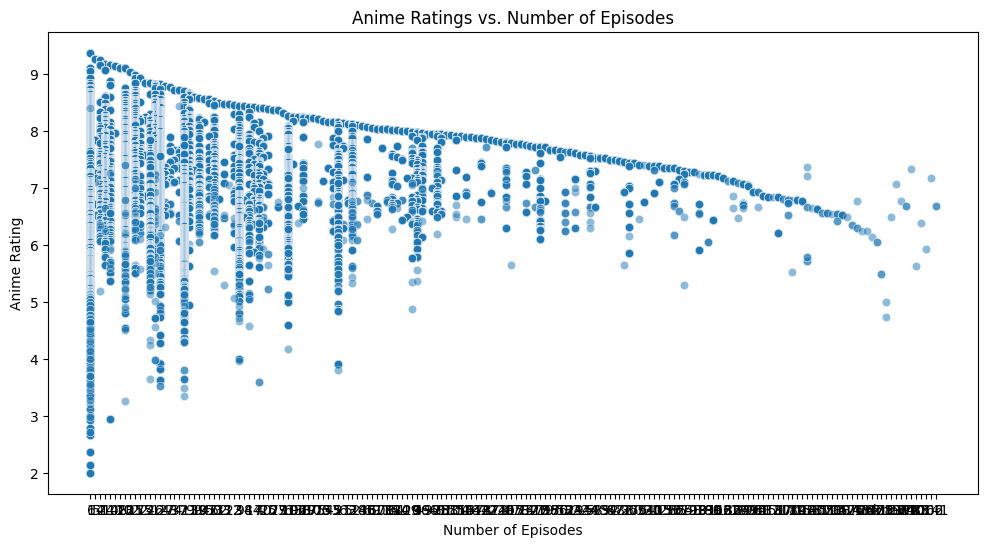

In [6]:
#Anime Ratings vs. Number of Episodes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='episodes', y='rating_x', data=df_final, alpha=0.5)
plt.title('Anime Ratings vs. Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Anime Rating')
plt.show()

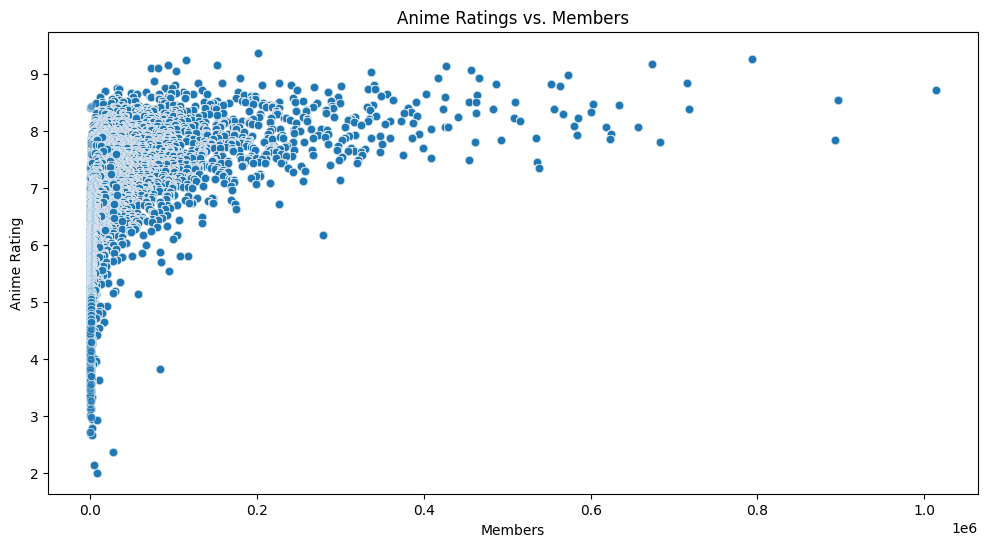

In [7]:
# Anime Ratings vs. Members
plt.figure(figsize=(12, 6))
sns.scatterplot(x='members', y='rating_x', data=df_final, alpha=0.5)
plt.title('Anime Ratings vs. Members')
plt.xlabel('Members')
plt.ylabel('Anime Rating')
plt.show()

/tmp/ipython-input-8-3804497196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type',y='rating_x',data=df_final,palette='pastel')


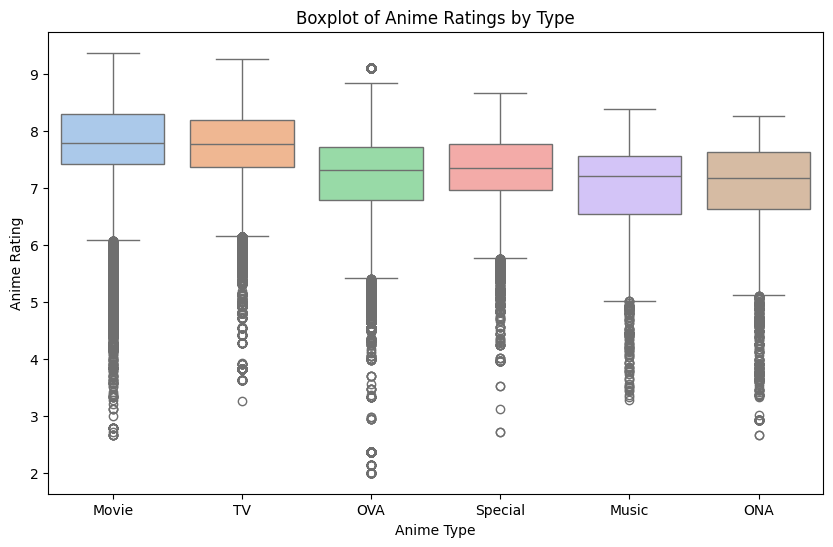

In [8]:
#Boxplot of Anime Ratings by type
plt.figure(figsize=(10,6))
sns.boxplot(x='type',y='rating_x',data=df_final,palette='pastel')
plt.title('Boxplot of Anime Ratings by Type')
plt.xlabel('Anime Type')
plt.ylabel('Anime Rating')
plt.show()


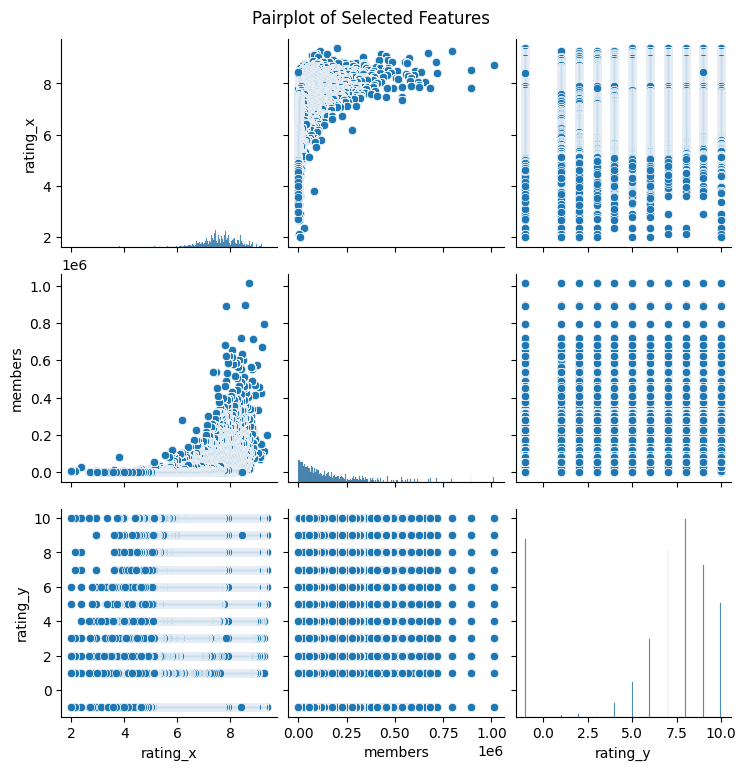

In [9]:
# Pairplot for selected features
sns.pairplot(df_final[['rating_x', 'episodes', 'members', 'rating_y']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

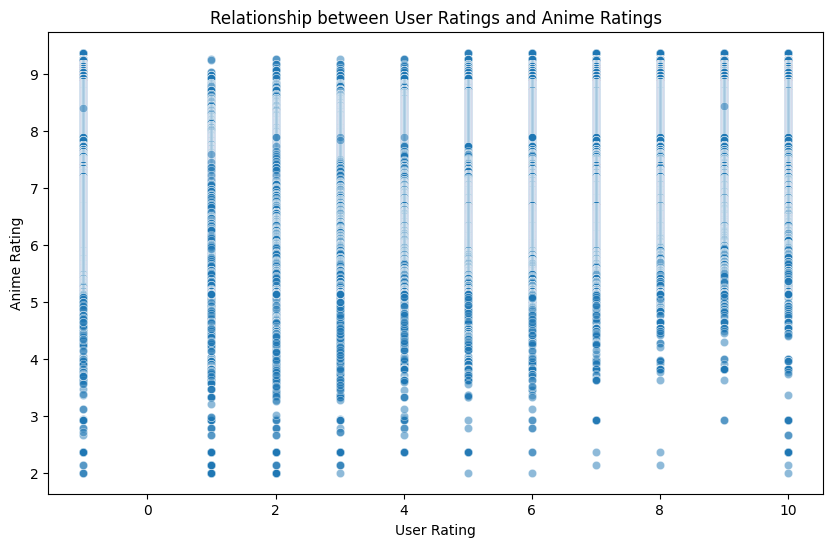

In [10]:
# Relationship between User Ratings and Anime Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_y', y='rating_x', data=df_final, alpha=0.5)
plt.title('Relationship between User Ratings and Anime Ratings')
plt.xlabel('User Rating')
plt.ylabel('Anime Rating')
plt.show()



In [11]:
# Remove outliers using IQR method
Q1 = df_final['rating_x'].quantile(0.25)
Q3 = df_final['rating_x'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Filter out values outside the IQR range
df_final_no_outliers = df_final[(df_final['rating_x'] >= Q1 - 1.5 * IQR) & (df_final['rating_x'] <= Q3 + 1.5 * IQR)]
df_final.shape                           #Before the Outlier Removal
df_final_no_outliers.shape               #After the Outlier Removal


(1586946, 9)

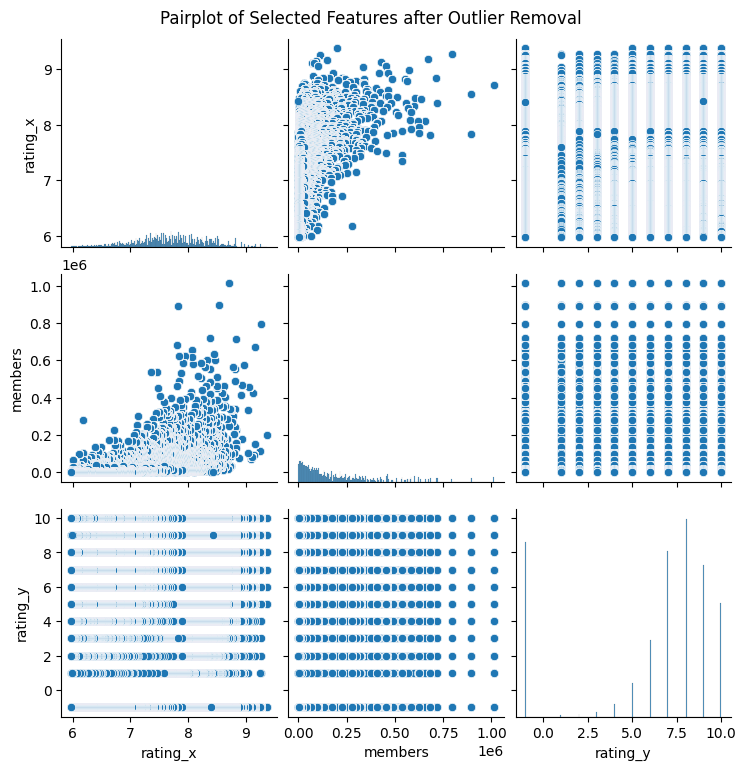

In [13]:
# Pairplot for selected features after outlier removal
sns.pairplot(df_final_no_outliers[['rating_x', 'episodes', 'members', 'rating_y']])
plt.suptitle('Pairplot of Selected Features after Outlier Removal', y=1.02)
plt.show()